# Question 3

## Use the posted VariationalAutoEncoder_demo.py file to testify the VAE.

1. Repeat the posted VAE script to plot the newly generated images. 

2. Modify the neural networks in the encoder and decoder layers and add one more layer with dimension 64 before the hidden factor n_z=2, i.e., the dimension reduction from 784->512->64->2. 

See if the VAE outputs are improved or not. 

 

In [1]:
from tensorflow.python import keras
print(keras.__version__)

2.6.0


In [1]:
import tensorflow as tf

(tain_images,train_labels),(test_images,test_labels) = tf.keras.datasets.mnist.load_data()

from keras.layers import Input, Dense, Lambda

from keras.models import Model

from keras.losses import binary_crossentropy

from keras.callbacks import LearningRateScheduler

import numpy as np

import matplotlib.pyplot as plt

import keras.backend as K




In [2]:

# m : batch size

m = 50   

# n_z : latent dimension

n_z = 2

# n_epoch : number of epoches for iterations

n_epoch = 10

 

epsilon_std=1.0

# intermediate_dim = 512

 

# Q(z|X) -- encoder

inputs = Input(shape=(784,))

h_q = Dense(512, activation='relu')(inputs)

mu = Dense(n_z, activation='linear')(h_q)

log_sigma = Dense(n_z, activation='linear')(h_q)


 

In [3]:
def sample_z(args):

    mu, log_sigma = args

    eps = K.random_normal(shape=(m, n_z), mean=0., stddev=epsilon_std)

    return mu + K.exp(log_sigma / 2) * eps




In [4]:
# Sample z ~ Q(z|X)

z = Lambda(sample_z)([mu, log_sigma])

In [5]:
# P(X|z) -- decoder

decoder_hidden = Dense(512, activation='relu')

decoder_out = Dense(784, activation='sigmoid')

 

h_p = decoder_hidden(z)

outputs = decoder_out(h_p)



In [6]:
# Overall VAE model, for reconstruction and training
# del model

vae = Model(inputs, outputs)

 

# Encoder model, to encode input into latent variable

# We use the mean as the output as it is the center point, the representative of the gaussian

encoder = Model(inputs, mu)

 

# Generator model, generate new data given latent variable z

d_in = Input(shape=(n_z,))

d_h = decoder_hidden(d_in)

d_out = decoder_out(d_h)

generator = Model(d_in, d_out)

In [7]:
def vae_loss(y_true, y_pred):

    """ Calculate loss = reconstruction loss + KL loss for each data in minibatch """

    # E[log P(X|z)]

    recon = K.sum(K.binary_crossentropy(y_pred, y_true), axis=1)

    # D_KL(Q(z|X) || P(z|X)); calculate in closed form as both dist. are Gaussian

    kl = 0.5 * K.sum(K.exp(log_sigma) + K.square(mu) - 1. - log_sigma, axis=1)

 

    return recon + kl



In [8]:
from keras.datasets import mnist

import numpy as np

(x_train, _), (x_test, y_test) = mnist.load_data()



In [9]:
x_train = x_train.astype('float32') / 255.

x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))

x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print (x_train.shape)

print (x_test.shape)

(60000, 784)
(10000, 784)


In [10]:
vae.compile(optimizer='adam', loss=vae_loss)

vae.fit(x_train, x_train, batch_size=m, epochs=n_epoch)




Epoch 1/10


TypeError: ignored

In [12]:
# from tensorflow.python.framework.ops import disable_eager_execution
# disable_eager_execution()

In [13]:
vae.fit(x_train, x_train, batch_size=m, epochs=n_epoch)


Epoch 1/10


TypeError: ignored

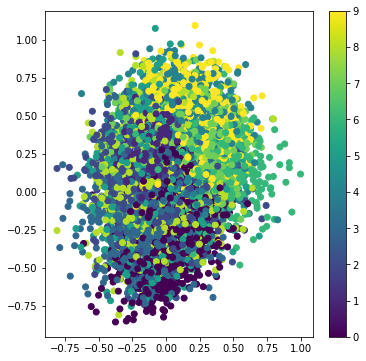

In [14]:
x_test_encoded = encoder.predict(x_test, batch_size=m)

plt.figure(figsize=(6, 6))

plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)

plt.colorbar()

plt.show()

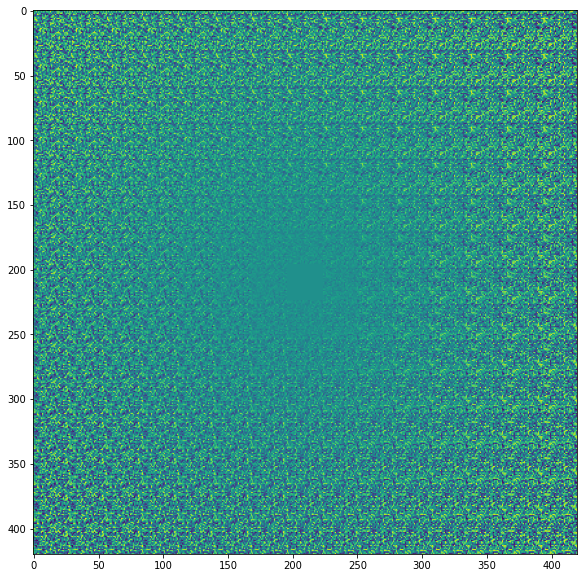

In [15]:
# display a 2D manifold of the digits

n = 15  # figure with 15x15 digits

digit_size = 28

figure = np.zeros((digit_size * n, digit_size * n))

# we will sample n points within [-15, 15] standard deviations

grid_x = np.linspace(-15, 15, n)

grid_y = np.linspace(-15, 15, n)

 

for i, yi in enumerate(grid_x):

    for j, xi in enumerate(grid_y):

        z_sample = np.array([[xi, yi]]) * 2.0

        x_decoded = generator.predict(z_sample)

        digit = x_decoded[0].reshape(digit_size, digit_size)

        figure[i * digit_size: (i + 1) * digit_size,

               j * digit_size: (j + 1) * digit_size] = digit

 

plt.figure(figsize=(10, 10))

plt.imshow(figure)

plt.show()

